In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import cluster

In [ ]:
%matplotlib inline

In [ ]:
sns.set(style="darkgrid")

In [ ]:
socio_economic_data = pd.read_csv('/content/master.csv')
#renaming columns according to convetion
socio_economic_data.columns = ['country','year','sex','age','suicides_no','population','suicides_rate','country_year','HDI','gdp','gdp_per_capita','generation']
socio_economic_data.head()

,country,year,sex,age,suicides_no,population,suicides_rate,country_year,HDI,gdp,gdp_per_capita,generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [ ]:
suicides = socio_economic_data[socio_economic_data['year']==2015].reset_index()
#renaming columns according to convetion
df1= suicides.drop(['country_year','index','HDI','year'],axis=1)
df1.head()

,country,sex,age,suicides_no,population,suicides_rate,gdp,gdp_per_capita,generation
0,Antigua and Barbuda,female,55-74 years,1.0,6403.0,15.62,"1,364,863,037",14853.0,Boomers
1,Antigua and Barbuda,female,15-24 years,0.0,8561.0,0.00,"1,364,863,037",14853.0,Millenials
2,Antigua and Barbuda,female,25-34 years,0.0,7740.0,0.00,"1,364,863,037",14853.0,Millenials
3,Antigua and Barbuda,female,35-54 years,0.0,15323.0,0.00,"1,364,863,037",14853.0,Generation X
4,Antigua and Barbuda,female,5-14 years,0.0,8239.0,0.00,"1,364,863,037",14853.0,Generation Z


In [ ]:
df2 = df1[['country','gdp_per_capita']].groupby(['country'], as_index=False).mean().sort_values(by = 'country', ascending = True)
df2.head()

,country,gdp_per_capita
0,Antigua and Barbuda,14853.0
1,Argentina,14981.0
2,Armenia,3775.0
3,Australia,60656.0
4,Austria,46484.0


In [ ]:
country_names = df2.country.unique()

In [ ]:
world_data = pd.read_csv("/content/countries of the world.csv")
#stripping whitespaces from country name
world_data['Country'] = world_data['Country'].str.strip()

In [ ]:
world_data.columns = (["country","region","population","area","density","coastline","migration","infant_mortality","gdp","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"])
world_data.country = world_data.country.astype('category')
world_data.country = world_data.country.str.replace('&','and')
world_data.region = world_data.region.astype('category')

#replacing , with . so that they can converted to floating point values
world_data.density = world_data.density.str.replace(",",".").astype(float)
world_data.coastline = world_data.coastline.str.replace(",",".").astype(float)
world_data.migration = world_data.migration.str.replace(",",".").astype(float)
world_data.infant_mortality = world_data.infant_mortality.str.replace(",",".").astype(float)
world_data.literacy = world_data.literacy.str.replace(",",".").astype(float)
world_data.phones = world_data.phones.str.replace(",",".").astype(float)
world_data.arable = world_data.arable.str.replace(",",".").astype(float)
world_data.crops = world_data.crops.str.replace(",",".").astype(float)
world_data.other = world_data.other.str.replace(",",".").astype(float)
world_data.climate = world_data.climate.str.replace(",",".").astype(float)
world_data.birthrate = world_data.birthrate.str.replace(",",".").astype(float)
world_data.deathrate = world_data.deathrate.str.replace(",",".").astype(float)
world_data.agriculture = world_data.agriculture.str.replace(",",".").astype(float)
world_data.industry = world_data.industry.str.replace(",",".").astype(float)
world_data.service = world_data.service.str.replace(",",".").astype(float)

In [ ]:
#renaming columns as per convention
world_data.columns = ['country', 'region', 'population', 'area', 'density', 'coastline',
                      'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
                      'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
                      'industry', 'service']

In [ ]:
world_data.head()

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
df3 = pd.read_csv("/content/2015.csv")
df3.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
names = df3['Country'].isin(country_names)
unique, counts = np.unique(names, return_counts = True)
dict(zip(unique, counts))

#filtering out rows with data from the country_name list
df3 = df3[df3['Country'].isin(country_names)]

#renaming columns as per convention
df3.columns = ['country', 'region', 'happiness_rank', 'happiness_score',
                'standard_error', 'economy', 'family',
                'health', 'freedom', 'trust',
                'generosity', 'dystopia_residual']
df3.head()

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001


In [ ]:
countries_clean = world_data[world_data['country'].isin(country_names)]
countries_clean.reset_index()

#imputation of NaN values in dataset
#NaNs are replaced by median values of the column
countries_clean['climate'].fillna(countries_clean['climate'].dropna().median(), inplace=True)
countries_clean['deathrate'].fillna(countries_clean['deathrate'].dropna().median(), inplace=True)
countries_clean.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
7,Antigua and Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678


In [ ]:
countries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 7 to 81
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           22 non-null     object  
 1   region            22 non-null     category
 2   population        22 non-null     int64   
 3   area              22 non-null     int64   
 4   density           22 non-null     float64 
 5   coastline         22 non-null     float64 
 6   migration         22 non-null     float64 
 7   infant_mortality  22 non-null     float64 
 8   gdp               22 non-null     float64 
 9   literacy          22 non-null     float64 
 10  phones            21 non-null     float64 
 11  arable            22 non-null     float64 
 12  crops             22 non-null     float64 
 13  other             22 non-null     float64 
 14  climate           22 non-null     float64 
 15  birthrate         22 non-null     float64 
 16  deathrate         22 non-nul

In [ ]:
df1.columns

Index(['country', 'sex', 'age', 'suicides_no', 'population', 'suicides_rate',
       'gdp', 'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
df2.columns

Index(['country', 'gdp_per_capita'], dtype='object')

In [ ]:
df3.columns

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy', 'family', 'health', 'freedom', 'trust',
       'generosity', 'dystopia_residual'],
      dtype='object')

In [ ]:
world_data.columns

Index(['country', 'region', 'population', 'area', 'density', 'coastline',
       'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [ ]:
countries_clean.columns

Index(['country', 'region', 'population', 'area', 'density', 'coastline',
       'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [ ]:
#joining the datsets df1, df2, df3, world_data, and countries_clean based on the `country` column
suicide_data = pd.merge(df1,pd.merge(df2,pd.merge(df3,pd.merge(world_data,countries_clean,on='country'),on='country'),on='country'),on='country')

In [ ]:
#saving the joined data
suicide_data.to_csv('suicide_analysis_4_joined_data.csv', index=False)

In [ ]:
suicide_data['sex'].value_counts()

male      108
female    108
Name: sex, dtype: int64

In [ ]:
suicide_data['age'].value_counts()

75+ years      36
15-24 years    36
55-74 years    36
25-34 years    36
35-54 years    36
5-14 years     36
Name: age, dtype: int64

In [ ]:
#categorical encoding of data 
suicide_data.loc[:, 'age'] = suicide_data['age'].str.replace(' years','')
suicide_data.loc[suicide_data['age'] == '5-14', 'age'] = '05-14'
suicide_data['age'] = suicide_data['age'].astype("category").cat.codes
suicide_data['sex'] = suicide_data['sex'].astype("category").cat.codes

In [ ]:
suicide_data.drop('country', axis = 1, inplace=True)

In [ ]:
suicide_data.head()

,sex,age,suicides_no,population,suicides_rate,gdp,gdp_per_capita_x,generation,gdp_per_capita_y,region,...,phones_y,arable_y,crops_y,other_y,climate_y,birthrate_y,deathrate_y,agriculture_y,industry_y,service_y
0,1,5,245.0,712691.0,34.38,"594,749,285,413",14981.0,Silent,14981.0,Latin America and Caribbean,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
1,1,1,656.0,3500580.0,18.74,"594,749,285,413",14981.0,Millenials,14981.0,Latin America and Caribbean,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
2,1,4,431.0,3011963.0,14.31,"594,749,285,413",14981.0,Boomers,14981.0,Latin America and Caribbean,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
3,1,2,465.0,3289927.0,14.13,"594,749,285,413",14981.0,Millenials,14981.0,Latin America and Caribbean,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
4,1,3,633.0,5166179.0,12.25,"594,749,285,413",14981.0,Generation X,14981.0,Latin America and Caribbean,...,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547


In [ ]:
suicide_data = suicide_data[['sex', 'age', 'suicides_no', 'population', 'suicides_rate', 'gdp',
                              'gdp_per_capita_x', 'generation', 'region',
                              'happiness_rank', 'happiness_score', 'standard_error', 'economy',
                              'family', 'health', 'freedom', 'trust', 'generosity',
                              'dystopia_residual', 'region_x', 'population_x', 'area_x', 'density_x',
                              'coastline_x', 'migration_x', 'infant_mortality_x', 'gdp_x',
                              'literacy_x', 'phones_x', 'arable_x', 'crops_x', 'other_x', 'climate_x',
                              'birthrate_x', 'deathrate_x', 'agriculture_x', 'industry_x',
                              'service_x']]

suicide_data.drop("population", axis=1, inplace=True)

#renaming columns as per convention
suicide_data.columns = ['sex', 'age', 'suicides_no', 'suicides_rate', 'gdp',
                        'gdp_per_capita', 'generation', 'region',
                        'happiness_rank', 'happiness_score', 'standard_error', 'economy',
                        'family', 'health', 'freedom', 'trust', 'generosity',
                        'dystopia_residual', 'region', 'population', 'area', 'density',
                        'coastline', 'migration', 'infant_mortality', 'gdp',
                        'literacy', 'phones', 'arable', 'crops', 'other', 'climate',
                        'birthrate', 'deathrate', 'agriculture', 'industry',
                        'service']

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#Question: Which features correlate heavily with suicide rate?

#####There are 2 features that correlate heavily with suicide rate:


1.   Gender
2.   Age



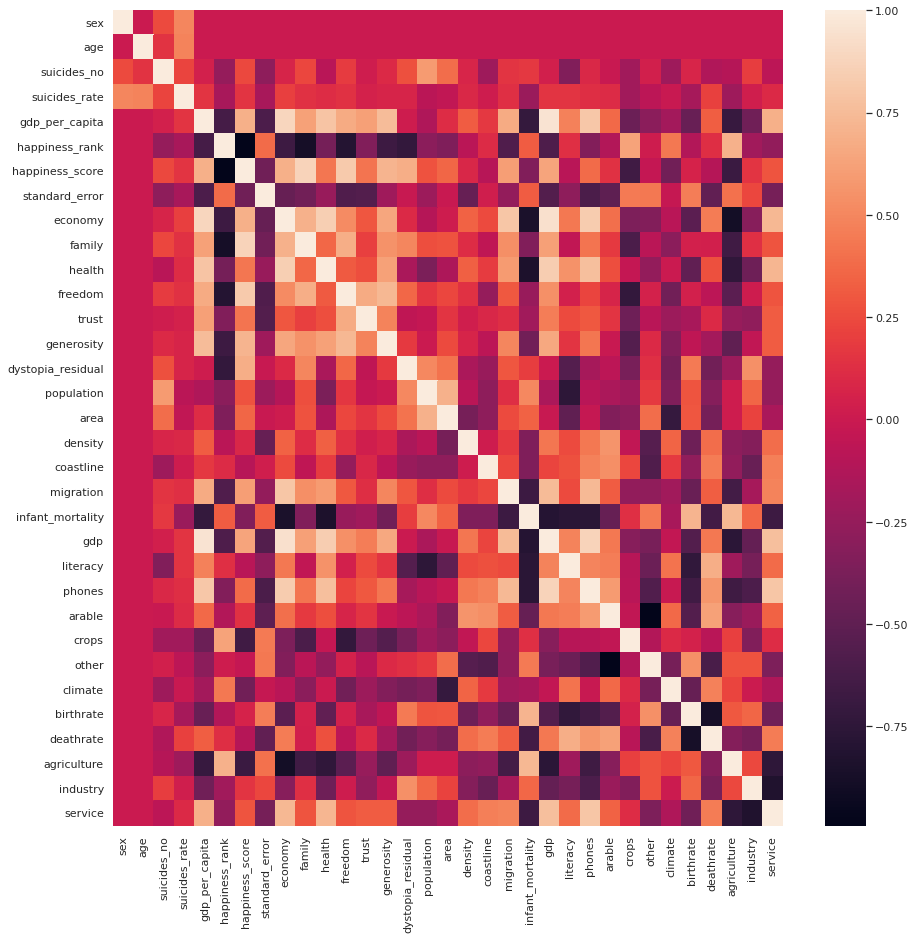

In [ ]:
corr = suicide_data.corr()
plt.figure(figsize=(15,15))
sns_plot1=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [ ]:
final_df = suicide_data[["suicides_rate","sex","age","population","migration",
                   "infant_mortality","deathrate","climate","literacy",
                   "gdp_per_capita","happiness_score"]]
final_df.columns = ["suicide_rate","gender","age_band","population",
              "net_migration","infant_mortality","death_rate",
              "climate","literacy","gdp_per_capita","happiness_score"]

final_df.head()

,suicide_rate,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
0,34.38,1,5,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
1,18.74,1,1,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
2,14.31,1,4,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
3,14.13,1,2,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
4,12.25,1,3,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574


In [ ]:
final_df = final_df[~final_df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

In [ ]:
final_df.describe()

,suicide_rate,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
count,204.000000,204.00000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,10.271176,0.50000,2.500000,2.728736e+07,-0.357059,11.230588,8.643529,2.764706,97.182353,25579.294118,6.288824
std,11.765776,0.50123,1.712026,4.505571e+07,3.312864,8.434752,2.264098,0.645965,3.517988,18615.025438,1.002440
min,0.000000,0.00000,0.000000,7.843010e+05,-8.580000,3.570000,4.230000,1.000000,86.400000,3775.000000,4.297000
25%,1.967500,0.00000,1.000000,5.231372e+06,-0.310000,4.660000,7.510000,3.000000,97.100000,9431.000000,5.689000
50%,6.450000,0.50000,2.500000,1.037907e+07,0.610000,7.180000,9.230000,3.000000,98.000000,18703.000000,6.574000
75%,14.120000,1.00000,4.000000,2.026408e+07,2.000000,18.590000,10.270000,3.000000,99.800000,43201.000000,6.983000
max,73.710000,1.00000,5.000000,1.880782e+08,3.980000,29.610000,13.250000,4.000000,100.000000,60656.000000,7.527000


In [ ]:
class machine_learning_algorithms:

  def __init__(self, data, test_size):
    self.test_size = test_size
    self.data = data
    self.sc = StandardScaler()
    self.pca = PCA(n_components=5)
    self.models_to_plot_kmeans = {0:131, 1:132, 2:133}
    self.models_to_plot_dendogram = {0:121, 1:122}
    self.col_names = ["suicide_rate","gender","age_band","population","net_migration","infant_mortality","death_rate",
                      "climate","literacy","gdp_per_capita","happiness_score"]

  def split_dataset(self):
    self.y = self.data['suicide_rate']
    self.x = self.data.drop('suicide_rate', axis=1)
    x_train, x_test, y_train, y_test = train_test_split(self.x, self.y, test_size=self.test_size, random_state=18)
    self.x_train, self.x_test, self.y_train, self.y_test = x_train, x_test, y_train, y_test
    print("Splitting of Dataset succesful")

  def liner_regression(self):
    self.lr = LinearRegression().fit(self.x_train, self.y_train)
    y_pred_lr = self.lr.predict(self.x_test)
    mean_absolute_error(y_pred_lr, self.y_test)
    print(f'Mean Absolute Error is {mean_absolute_error(y_pred_lr, self.y_test)} for linear regression model.')
    return y_pred_lr
  
  def plot_regression(self, y_pred):
    fig, ax = plt.subplots(figsize=(18,9))
    ax.scatter(self.y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([self.y.min(), self.y.max()], [self.y.min(), self.y.max()], 'b--', lw=2)
    ax.set_xlabel(f"Combined metric for {', '.join(self.col_names)}")
    ax.set_ylabel('Predicted number of suicides per 100k population')
    plt.show()
  
  def random_forest_regression(self):
    self.rf_model = RandomForestRegressor(random_state=8).fit(self.x_train, self.y_train)
    y_pred_rf = self.rf_model.predict(self.x_test)
    print('Mean Absolute Error is %2f for RandomForest Regression model after Train-Test split.' %(mean_absolute_error(y_pred_rf, self.y_test)))
    return y_pred_rf
  
  def determine_k_plot(self):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i,
                    init = 'k-means++',
                    n_init = 10,
                    max_iter = 300,
                    random_state = 0)
        km.fit(self.x)
        distortions.append(km.inertia_)
    plt.plot(range(1,11), distortions, marker = '+')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()
  
  def k_means_clustering(self, k):
    km = KMeans(n_clusters=k)
    km.fit(self.x)
    for i in range(3):
      a = list()
      a.append(final_df[km.labels_ == i]['suicide_rate'])
      plt.subplot(self.models_to_plot_kmeans[i])
      plt.title(f'Plot for cluster: {i}')
      plt.hist(a, bins = 20)
  
  def dendogram(self):
    Z = hierarchy.linkage(pdist(self.x), 'complete')
    plt.figure()
    dn = hierarchy.dendrogram(Z)
    plt.show()
    dn = hierarchy.dendrogram(Z)
    cuttree = cluster.hierarchy.cut_tree(Z, n_clusters=2)
    for i in range(2):
      a = list()
      a.append(final_df[cuttree == i]['suicide_rate'])
      plt.subplot(self.models_to_plot_dendogram[i])
      plt.hist(a, bins = 20)
      plt.show()

  def principal_component_analysis(self):
    x_std= self.sc.fit_transform(self.x)
    pca = self.pca.fit(x_std)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    sns.set(rc={'figure.figsize':(15,10)})
    sns.barplot(self.x_train.columns,pca.components_[0,:])
    plt.show()
    sns.set(rc={'figure.figsize':(15,10)})
    sns.barplot(self.x_train.columns,pca.components_[1,:])
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#creating object for machine learning algorithms class
#first argument: dataframe on which all the models can be trained
#second argument: percentage of data that will be used in test
mla = machine_learning_algorithms(final_df, 0.25)

In [ ]:
#splits the datset into train and test 
mla.split_dataset()

Splitting of Dataset succesful


In [ ]:
#training and prediction of the linear regression model
lr_pred = mla.liner_regression()

Mean Absolute Error is 5.483743093355196 for linear regression model.


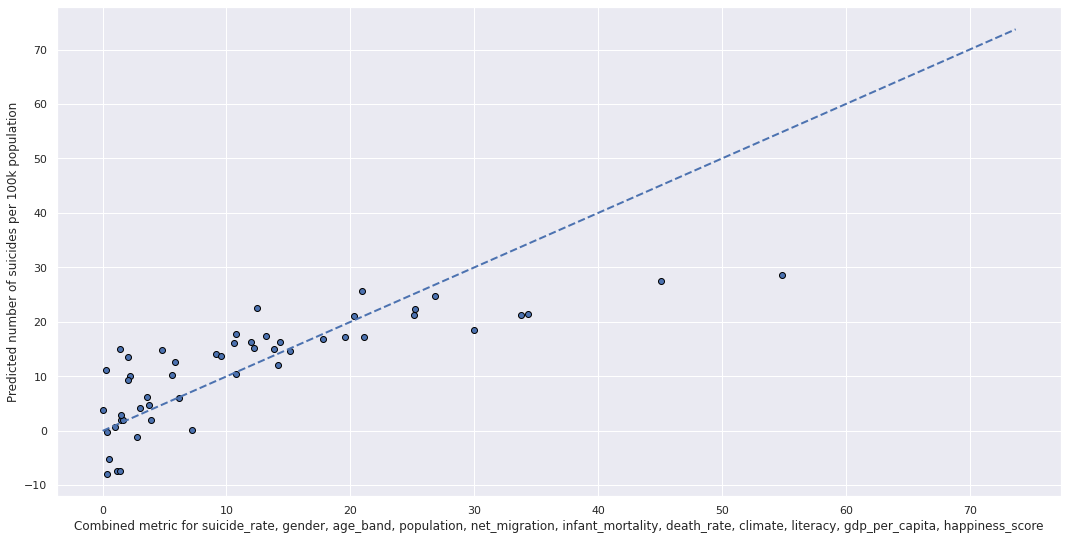

In [ ]:
#plotting the above result
mla.plot_regression(lr_pred)

In [ ]:
#training and prediction of the random forest regression model
rf_pred = mla.random_forest_regression()

Mean Absolute Error is 2.634924 for RandomForest Regression model after Train-Test split.


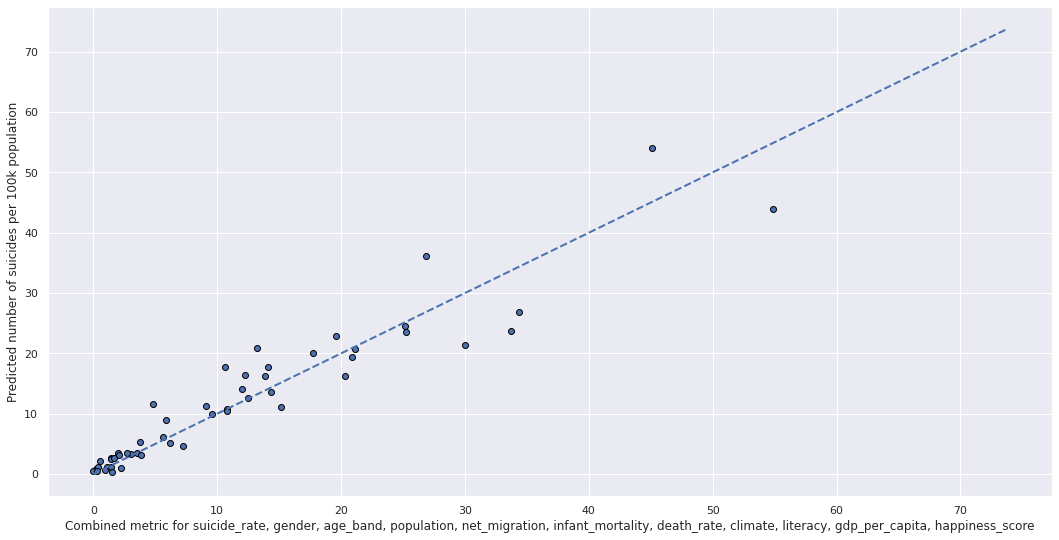

In [ ]:
#plotting the above result
mla.plot_regression(rf_pred)

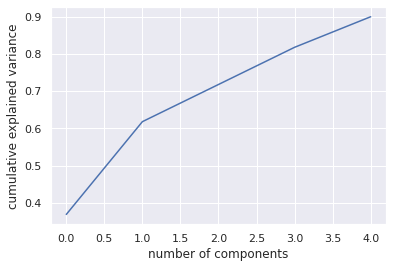

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


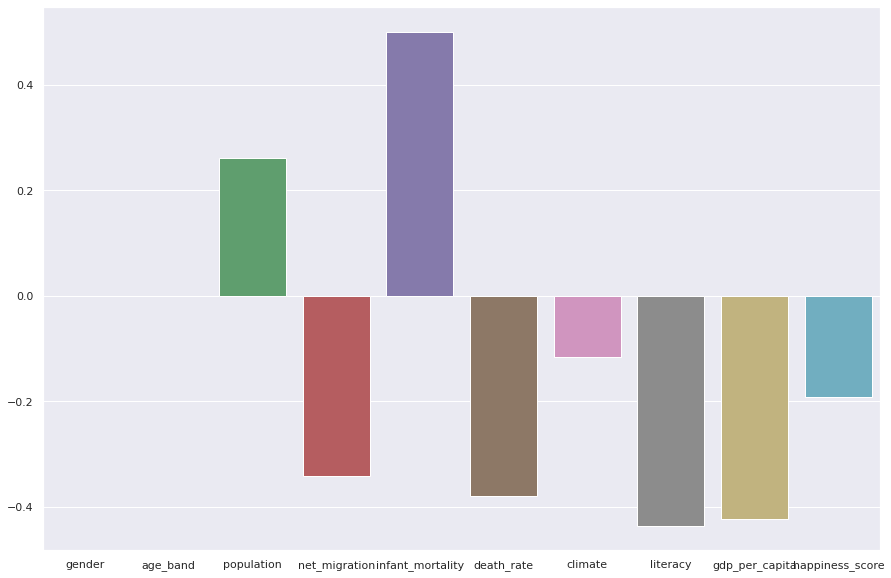

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


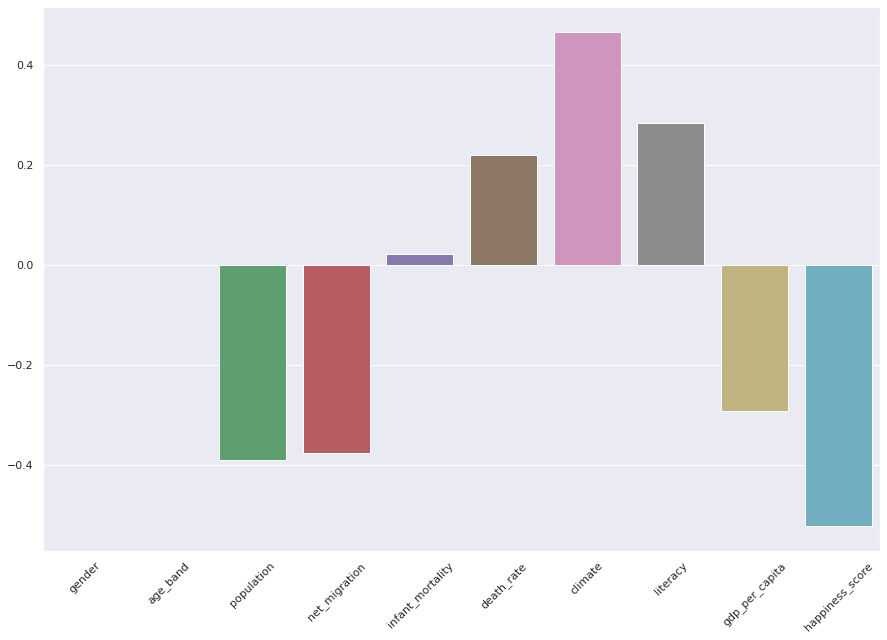

In [ ]:
#traing, and plotting the results of the Principal Component Analysis
mla.principal_component_analysis()

#Question: What should be the perfect value for K, ie. how many clusters should be made from the given data?

##### From the elbow diagram, we can say that `3` is the correct number of groups for clustering algorithm.

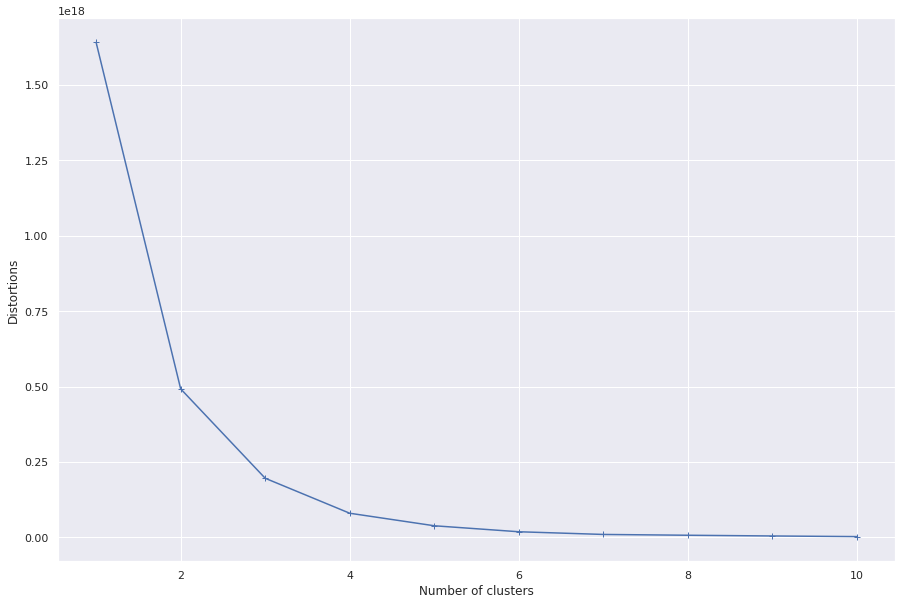

In [ ]:
mla.determine_k_plot()

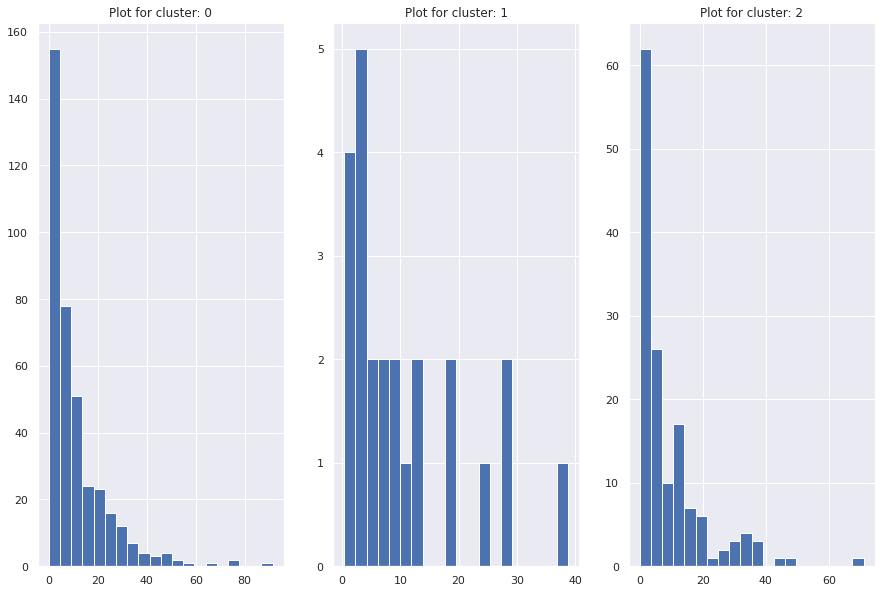

In [ ]:
mla.k_means_clustering(3)

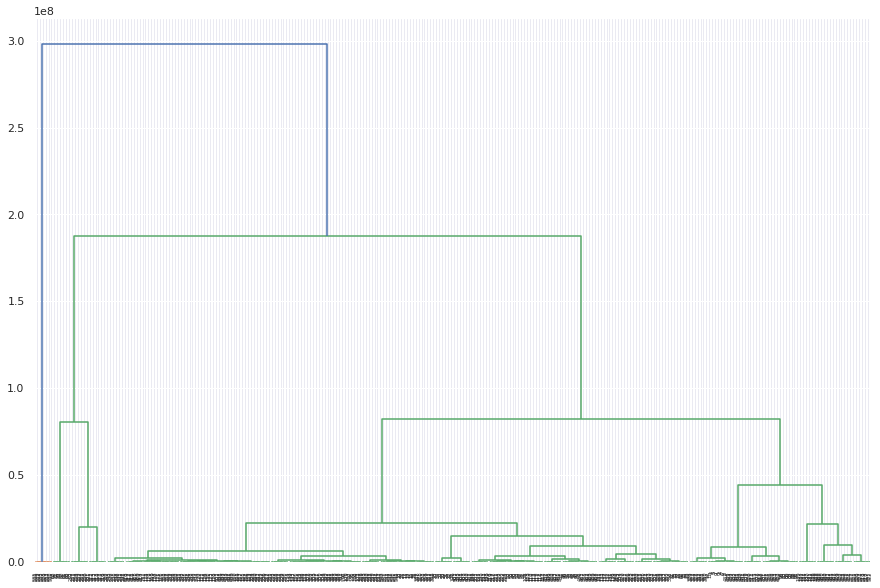

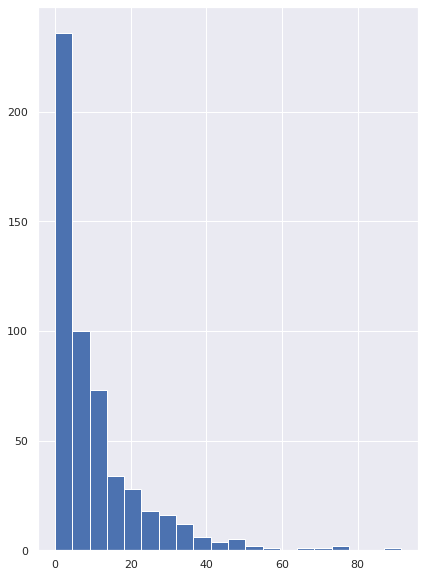

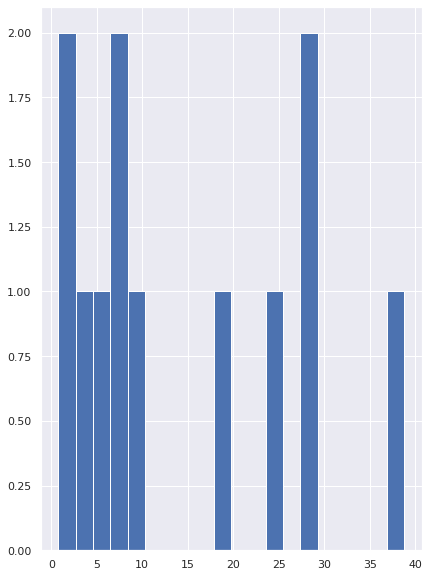

In [ ]:
#heirarchical clustering of data
#dendogramic respresentations pf the result
mla.dendogram()